# Homework #3

## PHYS 2600, Spring 2019

__Important notice:__ All cells in your notebook will be run, start to finish, using a fresh kernel when it is graded!  To make sure the graded notebook looks like what you expect, we recommend selecting "Kernel > Restart & Run All" in the menu above before you submit.

If you worked collaboratively on this assignment, __include the names of your collaborators in the cell below:__

_Type your answer here using Markdown._

## 3.0 - Homework correction (3 points)

In the cell below, explain and correct __one mistake__ you made on the previous homework assignment.  If you got a perfect score, great!  Tell us what your favorite problem was, or use the space to give any other feedback you might have on the class/tutorials/homework.

_Type your answer here using Markdown._

## 3.1 - Dealing with multiple arguments (6 points)

This problem concerns some typical 'gotcha' behaviors of function arguments that can lead to potential confusion.  Here is a brief reminder of some behaviors of functions that we discussed:

* Positional arguments given to a function are assigned in order to the argument names as in the `def...` statement.
* Keyword arguments can be in _any_ order, and are assigned to matching argument names as in the `def...` statement.
* A function call has its own __local scope__; any variable names inside are temporary and distinct from those in the original (global) scope.

For each of the code examples below, __explain the question in the comment__.  If you get stuck, refer back to lecture and tutorial 6, and don't be afraid to use the [Python Tutor](http://www.pythontutor.com/visualize.html#mode=edit)!

In [ ]:
# Example A
x = 2
def H(x):
    print(x)
H(x=3)
print(x)  ## Why doesn't this print 3?

__The statement `H(x=3)` doesn't actually assign to the variable `x`; instead, it's passing by keyword to the `x` inside the _local scope_ of `H`.  The value `x=2` in global scope is unchanged.__

In [ ]:
# Example B
x = 2; y = 3
def F(y,x):
    print(y,x)

F(x, y)  ## Why does this print 2 3, and not 3 2?

__Remember, when we evaluate any Python statement, we use the _values_ contained in variables.  In this case, all the function `F` knows is that we're calling `F(2,3)`, so it sets `y` to 2 and `x` to 3 according to its call signature.  The `x` and `y` variables in global scope have nothing to do with the ones in the local scope of `F`!__

In [ ]:
# Example C
x = 2; z = 3
def G(x, y=1, z=2):
    print(x,y,z)

G(x, z)  ## Why does this print 2 3 2, and not 2 1 3?

__This is a tricky one, but it has to do with positional vs. keyword arguments.  When we call `G`, we give both arguments positionally: `G(x,z)` is equivalent to `G(x=x, y=z)`.  So inside of the function, local `y` is set to the value 3 (from the global-scope variable `z`), and local `z` assumes its default value of 2.__

## 3.2 - Lots of plots (16 points)

### Part A (3 points)

Plot the function $f(x) = e^x + \sin(2x) - x^2$ over the range $-2 \leq x \leq 2$.  __On the same plot__, include the function $g(x) = e^x$.  __Your plot should satisfy the following:__

- Color: $f$ should be blue, and $g$ should be red.
- Markers: no markers shown, just the lines.
- Style: $f$ should be a solid line, and $g$ should be a dotted or dashed line.
- Include a legend which shows clearly which function corresponds to which curve!

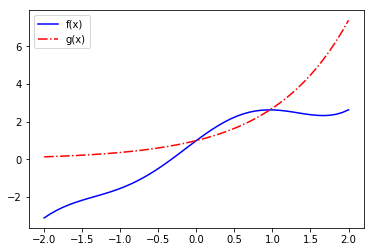

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### BEGIN SOLUTION
x = np.linspace(-2,2,50)
f = np.exp(x) + np.sin(2*x) - x**2
g = np.exp(x)

plt.plot(x,f,color='blue', label='f(x)')
plt.plot(x,g,color='red',linestyle='-.', label='g(x)')
plt.legend()
### END SOLUTION

### Part B (3 points)

Since `plt.plot()` simply takes lists of $x$ and $y$ coordinates for points, we've seen that it can easily deal with either lists of data, or functions plotted using `np.linspace`.  In fact, we can also easily use it with __parametric plots__, where both $x$ and $y$ are functions of some auxiliary variable $t$.

__Make a plot of an ellipse below__ using `plt.plot`.  The equation for the ellipse you should plot is:

\\[
x = 1 + 2 \cos(t) \\
y = \sin(t)
\\]

You can choose whatever range of $t$ you want, but make sure your ellipse doesn't have any gaps or jagged edges!

To make it obvious that your ellipse is, in fact, an ellipse, __show your plot with both x and y ranging from -3 to 3.__

(-3, 3)

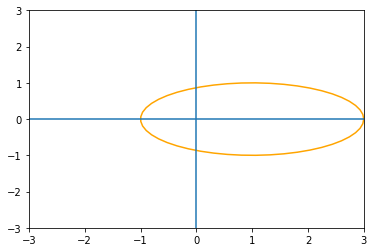

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### BEGIN SOLUTION
t = np.linspace(0, 2*np.pi, 50)
ellipse_x = 1 + 2*np.cos(t)
ellipse_y = np.sin(t)

plt.plot(ellipse_x, ellipse_y, color='orange')
# Draw axes to make it look a little nicer
plt.axhline(0)
plt.axvline(0)
plt.xlim(-3,3)
plt.ylim(-3,3)
### END SOLUTION

### Part C (5 points)

_(adapted from Langtangen 5.28.)_

A certain type of _wave packet_ is defined by the function

\\[
y(x,t) = e^{-(x-3t)^2} \sin(3\pi (x-3t))
\\]

This describes a "traveling wave" propagating through some medium; the shape of the packet remains fixed as it travels.  To see this, let's make a plot!  __Your plot should have the following content:__

* It should be a plot versus $x$, over the range $-10 \leq x \leq 10$.
* It should show the "wave packet" function $y(x,t)$ above versus $x$, for __five values of t__: -2, -1, 0, 1, and 2.
* Each plot $y(x,t)$ for a given value of $t$ should be drawn as a different color.  (Pyplot should do this for you by default!)
* The plot should have a legend of the form $t=X$, labeling each curve with the value of $t$ _as an integer_.  (Remember string formatting?  Now we really need it to get a nice-looking plot legend!)

To discourage you from just using copy-and-paste, I've included a function stub `plot_wave_packet(x,t)` below, which you can implement to create the plot.  In fact, __you're only allowed to call `plt.plot()` inside of `plot_wave_packet(x,t)`__, just to make sure you're not tempted to copy-and-paste.  (To iterate over the five values of `t` with this function, a `for` loop would be helpful.)

_(Note on functions and `pyplot`: since `pyplot` in general uses a single "global state" per cell, __your function doesn't have to return anything at all__; it can just operate on the global state with `plt.plot()` and other operations, and the plot will be created and shown in whatever cell you call_ `plot_wave_packet` _from.)_

If you're bothered by how the legend most likely ends up overlapping part of your plot, have a look at the `bbox_to_anchor=...` keyword argument to `plt.legend()`, and see if you can fix the problem.  (This part is optional, but a useful thing to know about!)

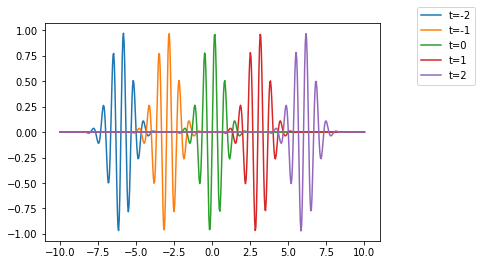

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_wave_packet(x, t):
    ### BEGIN SOLUTION
    u = (x-3*t)
    y = np.exp(-u**2) * np.sin(3*np.pi*(x-3*t))

    plt.plot(x,y, label='t={:d}'.format(t))
    plt.legend(bbox_to_anchor=(1.3,1.1))
    
### END SOLUTION
    

x = np.linspace(-10,10,500)
plot_wave_packet(x,-2)
plot_wave_packet(x,-1)
plot_wave_packet(x,0)
plot_wave_packet(x,1)
plot_wave_packet(x,2)


### Part D (5 points)

Now an exercise in simple two-dimensional ballistics.  We'll start by recalling two textbook formulas for the trajectory $y(x)$ and for the maximum range $R$ of an object moving in 2d under the influence of gravity, starting at $y=0$:

\\[
y(x) = x \tan \theta - \frac{gx^2}{2v_0^2 \cos^2 \theta} \\
R = \frac{v_0^2 \sin(2\theta)}{g}
\\]

A great way to test these formulas against each other is with a plot!  Let's fix $g=9.8\ m/s^2$ and $v_0 = 4$ m/s, and then __create a plot with the following properties:__

* Show $y(x)$ as a solid line for two trajectories, $\theta = 20$ degrees and $\theta = 40$ degrees.
* Show $R$ for each trajectory as a __dashed, vertical line__ on the same plot, with the _same color_ as the corresponding $y(x)$.
* Include a legend to show which trajectory is which.

The simplest way to add a vertical line to your plot is the `plt.vlines()` function; for things like color and line style, it takes the same options that `plt.plot()` does.

Choosing the plot range, colors, etc. are up to you: the only requirement is that your plot should be easily usable to see that $y(x)$ and $R$ agree on the maximum range of your projectile in both cases.



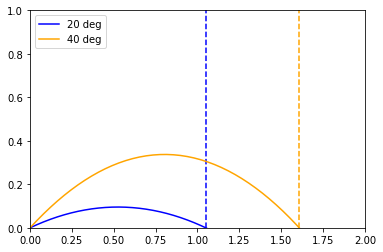

In [5]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.8  # m/s^2
v0 = 4.0 # m/s
### BEGIN SOLUTION

x = np.linspace(0,2,50)
def traj(x, v, th):
    return x*np.tan(th) - g*x**2 / (2*v**2 * np.cos(th)**2)
def R(x, v, th):
    return v**2 *np.sin(2*th) / g

theta_20 = 20 * np.pi/180
theta_40 = 40 * np.pi/180

plt.plot(x, traj(x,v0,theta_20), color='blue', label='20 deg')
plt.plot(x, traj(x,v0,theta_40), color='orange', label='40 deg')

plt.vlines(R(x,v0,theta_20),  0, 1, color='blue', linestyle='--')
plt.vlines(R(x,v0,theta_40),  0, 1, color='orange', linestyle='--')

plt.xlim(0,2)
plt.ylim(0,1)

plt.legend(loc='upper left')


### END SOLUTION


## 3.3 - Meta-formatting pi (6 points)

One of the more interesting uses of escape characters is to _generate_ format strings depending on the value of a variable, which we can then turn around and use as a dynamically-defined format string for some data.

Implement the function __pi_to_digits(n)__ below, which should print a string matching the following format:

```python
>>> pi_to_digits(6)
'The number pi is equal to 3.14159 to 6 digits of accuracy.'
```

I've given you pi to 30 digits as a starting point, and two tests that your function should pass if it's properly implemented.

In [6]:
pi = 3.14159265358979311599796346854

def pi_to_digits(n):
    ### BEGIN SOLUTION
    digit_string = '%.' + '%d'% (n-1) + 'f'
    pi_string = 'The number pi is equal to ' + digit_string + ' to %d digits of accuracy.'
    return pi_string % (pi, n)
    ### END SOLUTION
    
    
print(pi_to_digits(6))

The number pi is equal to 3.14159 to 6 digits of accuracy.


In [7]:
from nose.tools import assert_equal
assert_equal(pi_to_digits(6), 'The number pi is equal to 3.14159 to 6 digits of accuracy.')
assert_equal(pi_to_digits(4), 'The number pi is equal to 3.142 to 4 digits of accuracy.')

## 3.4 - Intro to Markdown (8 points)

Now that we've learned how to print things out nicely in Python, let's dive into the other way of writing nice text in Python, the Markdown markup language.  Markdown is ubiquitous on the internet; in particular, Wikipedia and other wikis use Markdown natively for notation.  WhatsApp uses a subset of Markdown for formatting, so you may have encountered it there.  And of course, almost all the class materials are written in Markdown!

We'll start with the basics of Markdown notation, and cover math notation using MathJax another time.  A more complete Markdown cheat sheet is [available here](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).

Start by double-clicking on the Markdown cell immediately below this one to see the Markdown source.  The actual problem appears in the cell after the big example.

# Headings
## Come
### In
#### Five
##### Sizes
###### (Sometimes six, but not in Jupyter)

## Text emphasis

We can add _emphasis_ to our text in a few different ways: _italic_, __bold__, or ~~strikethrough~~.  There are alternative ways to write *italic* and **bold** - we can mix them together to get _**bold** italics_.

## Code

Often we want to write Python code snippets in our Markdown blocks, which uses a special notation to get the gray highlighting and different font (called 'monotype' since the characters are all the same width): `print("Hello, world!")`

We can put multi-line code snippets in our Markdown, too:
```
x=1
y=2
print(x**y)
```
If we add the language name to the top, we can even get nice _syntax highlighting_, just like Jupyter does for us in the code cells!
```python
x=1
y=2
print(x**y)
```

## Lists

Markdown is great at making both ordered and unordered lists in a natural way!  Write the ordered list with numbers:

1. Total energy is always conserved.
9. Entropy of an isolated system always increases.
5. Entropy of an isolated system approaches a universal constant as T goes to absolute zero.

Slightly counter-intuitive: Markdown doesn't care which numbers you use, or how you order them - it gives you a simple numbered list!  Unordered lists can be written with asterisks:

* Bread
* Eggs
* Milk
+ Yogurt
- Bananas


Dashes and plus signs are equally valid for unordered lists; you can even mix and match (as seen above.)

## External links

There's a complicated set of rules for adding all kinds of links to a Markdown document, but the simplest useful one is just linking to something external.  The syntax has two entries: the first is the _label_, and the second is the _link_.

[This is a link to Google.](http://www.google.com)

The link itself should be a valid URL - exactly what appears in your web browser bar when you load a page.  You can just copy directly out of the browser bar to grab a page link that you're looking at.

__Now the homework problem!__  Your mission is to give a brief explanation in Markdown, in your own words, of the principle of conservation of energy.  (If you need to jog your memory, this page might be helpful:)

[https://cnx.org/contents/Ax2o07Ul@13.5:xa2wEvur@9/Conservation-of-Energy](https://cnx.org/contents/Ax2o07Ul@13.5:xa2wEvur@9/Conservation-of-Energy)

To fully flex your Markdown muscle, __you must include the following in your explanation:__

- One first-level header reading "Conservation of Energy";
- Three second-level headers, reading "The Law of Conservation of Energy", "Types of Energy", and "Examples of Energy Conversion".
- At least one example of each type of emphasis: bold, italic, and bold italic.
- A list, ordered or unordered, containing three different examples of types of energy (your first can be "kinetic energy".)
- An external link to the URL given above, with some text description.
- A multi-line code example, showing a Python snippet which adds together the kinetic energy and gravitational potential energy for a 1 kg mass moving at 5 m/s, and at a height of 12 meters.



_Type your answer here using Markdown._